In [680]:
%matplotlib inline

import csv
import pandas as pd
from operator import itemgetter
import pylab
import datetime
import numpy
import matplotlib.image
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from operator import itemgetter
import numpy as np
from numpy import *

In [681]:
tashu = pd.read_csv('tashu.csv', dtype={'RETURN_DATE': str})
station = pd.read_csv('./station.csv')

In [682]:
kiosk_per_district_count = station.groupby('구별').키오스크번호.count()
kiosk_per_district_count

구별
대덕구    23
동구     17
서구     46
유성구    35
중구     23
Name: 키오스크번호, dtype: int64

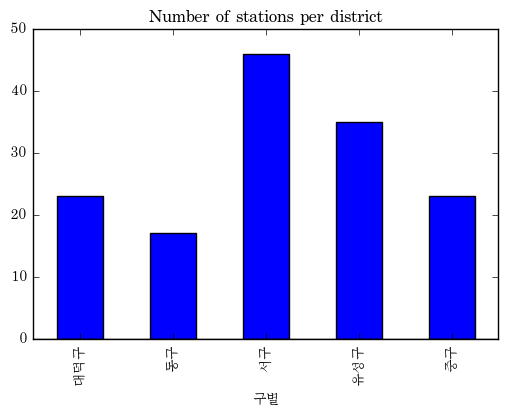

In [683]:
plt.title('Number of stations per district')
kiosk_per_district_count.plot(kind='bar');
plt.axhline(0, color='k')
plt.rc('font', family='AppleMyungjo')
plt.show()

In [685]:
kiosk_district_dict = dict(zip(station.키오스크번호, station.구별))
kiosk_district_dict

{1: '유성구',
 2: '유성구',
 3: '서구',
 4: '서구',
 5: '서구',
 6: '서구',
 7: '서구',
 8: '서구',
 9: '서구',
 10: '서구',
 11: '서구',
 12: '서구',
 13: '서구',
 14: '서구',
 15: '서구',
 16: '서구',
 17: '서구',
 18: '서구',
 19: '서구',
 20: '서구',
 21: '유성구',
 22: '유성구',
 23: '유성구',
 24: '유성구',
 25: '유성구',
 26: '유성구',
 27: '유성구',
 28: '유성구',
 29: '서구',
 30: '서구',
 31: '유성구',
 32: '유성구',
 33: '서구',
 34: '서구',
 35: '서구',
 36: '서구',
 37: '서구',
 38: '서구',
 39: '서구',
 40: '서구',
 41: '서구',
 42: '서구',
 43: '서구',
 44: '서구',
 45: '서구',
 46: '서구',
 47: '서구',
 48: '서구',
 49: '서구',
 50: '서구',
 51: '서구',
 52: '서구',
 53: '서구',
 54: '유성구',
 55: '유성구',
 56: '유성구',
 57: '유성구',
 58: '유성구',
 59: '유성구',
 60: '유성구',
 61: '유성구',
 62: '유성구',
 63: '유성구',
 64: '유성구',
 65: '유성구',
 66: '유성구',
 67: '유성구',
 68: '유성구',
 69: '유성구',
 70: '유성구',
 71: '대덕구',
 72: '대덕구',
 73: '대덕구',
 74: '대덕구',
 75: '대덕구',
 76: '대덕구',
 77: '대덕구',
 78: '대덕구',
 79: '대덕구',
 80: '대덕구',
 81: '대덕구',
 82: '대덕구',
 83: '중구',
 84: '중구',
 85: '중구',
 86: '중구',
 87: '중구',
 88: '중구',


In [686]:
# Data cleansing
tashu = tashu.dropna()
tashu['RENT_DATE'] = pd.to_datetime(tashu['RENT_DATE'], format = '%Y%m%d%H%M%S')
tashu['RETURN_DATE'] = pd.to_datetime(tashu['RETURN_DATE'], format = '%Y%m%d%H%M%S')
tashu[:10]

,RENT_STATION,RENT_DATE,RETURN_STATION,RETURN_DATE
0,43.0,2013-01-01 05:56:03,34.0,2013-01-01 06:02:17
2,2.0,2013-01-01 06:04:06,10.0,2013-01-01 06:18:59
3,106.0,2013-01-01 10:53:05,105.0,2013-01-01 10:57:43
4,4.0,2013-01-01 11:22:23,4.0,2013-01-01 12:17:53
5,21.0,2013-01-01 11:39:53,105.0,2013-01-01 11:49:43
6,90.0,2013-01-01 12:08:33,91.0,2013-01-01 12:51:36
7,13.0,2013-01-01 13:14:29,30.0,2013-01-01 13:30:39
8,1.0,2013-01-01 13:37:42,1.0,2013-01-01 13:38:15
9,1.0,2013-01-01 13:38:13,2.0,2013-01-01 15:09:58
10,1.0,2013-01-01 13:38:47,2.0,2013-01-01 15:10:14


In [687]:
usage_per_district = {}
for usage in tashu['RENT_STATION']:
    if usage in kiosk_district_dict:
        if kiosk_district_dict[usage] in usage_per_district:
            usage_per_district[kiosk_district_dict[usage]] += 1
        else:
            usage_per_district[kiosk_district_dict[usage]] = 1
     
usage_per_district

{'대덕구': 188524, '동구': 122669, '서구': 1590360, '유성구': 1141250, '중구': 256616}

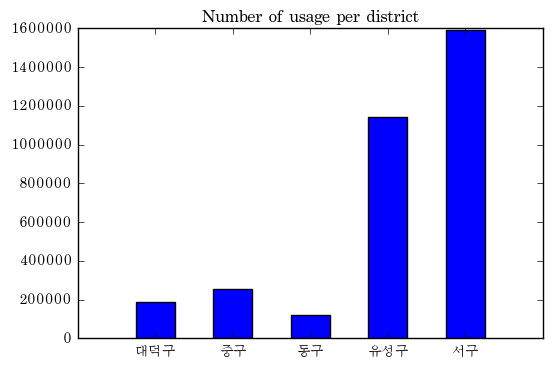

In [688]:
X = np.arange(len(usage_per_district))
plt.bar(X, usage_per_district.values(), align='center', width=0.5)
plt.xticks(X, usage_per_district.keys())
plt.title('Number of usage per district')
plt.rc('font', family='AppleMyungjo')
plt.show()

In [689]:
tashu['weekday'] = pd.DatetimeIndex(tashu['RENT_DATE']).weekday
weekday = tashu.groupby('weekday').RENT_STATION.count()
weekday

weekday
0    461111
1    446057
2    470480
3    462138
4    511883
5    537453
6    505037
Name: RENT_STATION, dtype: int64

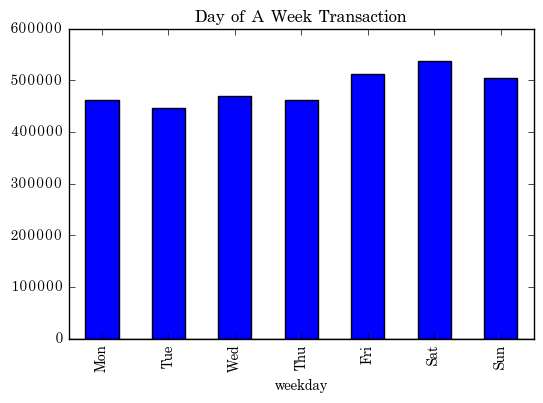

In [690]:
plt.title('Day of A Week Transaction')
weekday.plot(kind='bar'); plt.axhline(0, color='k')
plt.xticks((0,1,2,3,4,5,6),('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'))
plt.show()

In [691]:
y_hour_count = [0] * 24

for rent_time in tashu['RENT_DATE']:
    y_hour_count[rent_time.hour] += 1
    
x_hour = []
for i in range(0,24,1):
    x_hour.append(i)

print('\n'.join('{}: {}'.format(*k) for k in enumerate(y_hour_count)))

0: 62958
1: 15155
2: 198
3: 3
4: 11
5: 16493
6: 22056
7: 128812
8: 185919
9: 141733
10: 111356
11: 95950
12: 118313
13: 156979
14: 172764
15: 166344
16: 193716
17: 250090
18: 291991
19: 240166
20: 259038
21: 272831
22: 250718
23: 240565


<Container object of 24 artists>

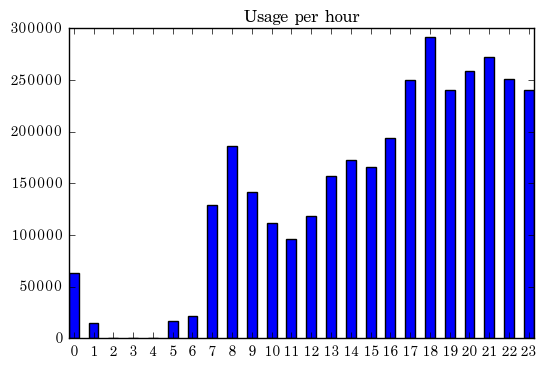

In [692]:
plt.xticks(np.arange(0, max(x_hour)+1, 1.0))
plt.title("Usage per hour")
#plt.plot(y_hour_count, 'rs--')
plt.bar(range(len(y_hour_count)), y_hour_count, 0.5, color="blue", align="center")

In [693]:
weekday_usage = [[],[],[],[],[],[],[]]
asdf = 0
for row in tashu['RENT_DATE']:
    weekday_usage[row.weekday()].append(row.hour)

In [694]:
weekday_usage_hour_count = [[],[],[],[],[],[],[]]

for i in range(0,7,1):
    for j in range(0,24,1):
        weekday_usage_hour_count[i].append(weekday_usage[i].count(j))

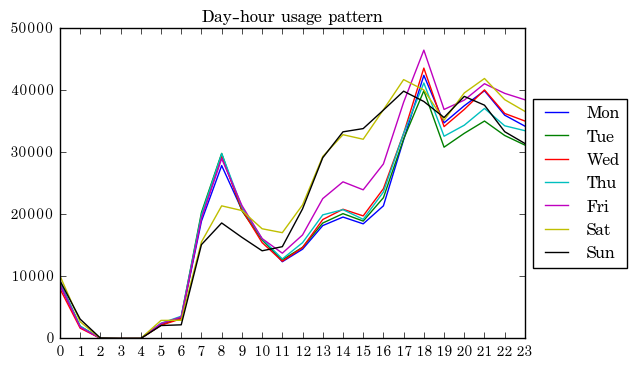

In [695]:
plt.xticks(np.arange(0, 24, 1))
plt.title("Day-hour usage pattern")

ax = plt.subplot(111)
dates = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
i=0
for day_hour in weekday_usage_hour_count:
    plt.plot(day_hour, label=dates[i])
    i+=1
    
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))